
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings. filterwarnings('ignore')

In [3]:
#reading first csv file i.e. movies.csv
dfm=pd.read_csv("movies.csv")

In [4]:
dfm.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#reading second csv file i.e. ratings.csv
df=pd.read_csv("ratings.csv")

In [6]:
df.head(5)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
print(df.shape)
print(dfm.shape)

(105339, 4)
(10329, 3)


In [8]:
#merging both csv file
df=df.merge(dfm,how='outer',on='movieId')

In [9]:
df.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1.0,16,4.0,1.217898e+09,Casino (1995),Crime|Drama
1,9.0,16,4.0,8.426867e+08,Casino (1995),Crime|Drama
2,12.0,16,1.5,1.144396e+09,Casino (1995),Crime|Drama
3,24.0,16,4.0,9.634688e+08,Casino (1995),Crime|Drama
4,29.0,16,3.0,8.368202e+08,Casino (1995),Crime|Drama


In [10]:
df.shape

(105343, 6)

In [11]:
df["movieId"].nunique()

10329

In [12]:
df["title"].nunique()

10327

In [13]:
df["genres"].nunique()

938

In [14]:
df["title"].describe()

count                  105343
unique                  10327
top       Pulp Fiction (1994)
freq                      325
Name: title, dtype: object

In [15]:
#removing space on right or left of the String values
df["title"]=df["title"].apply(lambda x: x.strip())
df["genres"]=df["genres"].apply(lambda x: x.strip())

In [16]:
df["genres"].describe()

count     105343
unique       938
top        Drama
freq        7680
Name: genres, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105343 entries, 0 to 105342
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  float64
 1   movieId    105343 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  float64
 4   title      105343 non-null  object 
 5   genres     105343 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 5.6+ MB


In [18]:
#making an array of Genere
genres=[]
for genre in df.genres:
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    

In [19]:
print(genres)

['Crime', 'Drama', 'Sci-Fi', 'Mystery', 'Thriller', 'Action', 'War', 'Adventure', 'IMAX', 'Comedy', 'Romance', 'Western', 'Horror', 'Fantasy', 'Musical', 'Film-Noir', 'Children', 'Animation', 'Documentary', '(no genres listed)']


In [20]:
movie_title=[]
for title in df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)  

In [21]:
print(movie_title)

['Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Casino', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder', 'Powder',

In [22]:
#Word Cloud is a data visualization technique used for representing text data 
#in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud

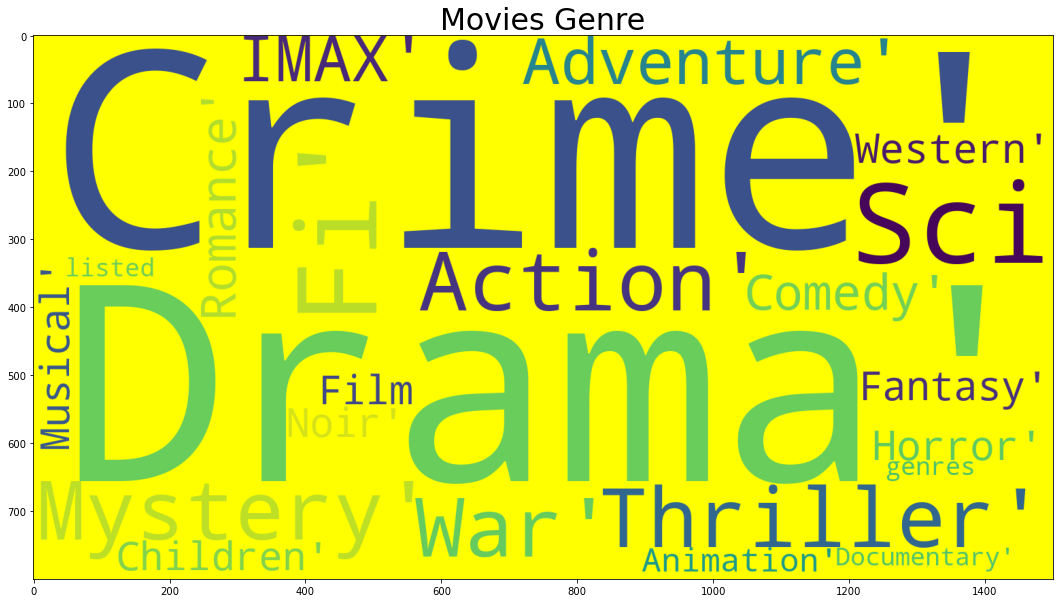

In [23]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='yellow',min_word_length=3).generate(genres)
plt.figure(figsize=(30,10))
plt.title('Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

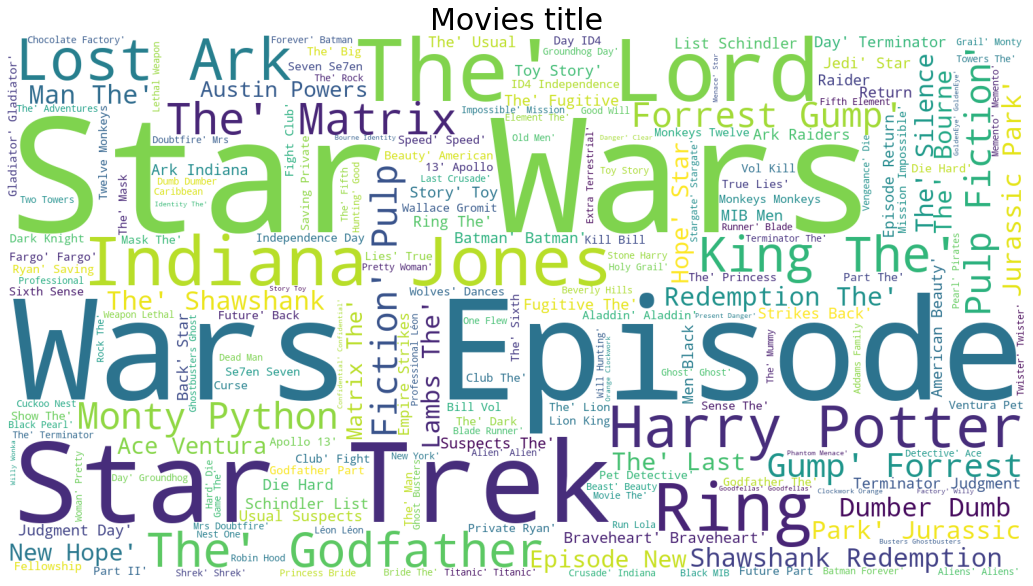

In [24]:
wordcloud_title=WordCloud(width=1500,height=800,background_color='white',min_word_length=3).generate(movie_title)
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [25]:
#just to check the frequency of movies 
print(movie_title.count("Star Wars"))
print(movie_title.count("Star Trek"))
print(movie_title.count("Godfather"))

997
632
410


In [26]:
#extracting top 20 movies with highest rating
dt=df.groupby(['title'])[['rating']].sum()
hrate=dt.nlargest(20,'rating')
hrate

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


In [27]:
#extracting top 20 movies rated by user
dt=df.groupby(['title'])[['rating']].count()
hrate=dt.nlargest(20,'rating')
hrate
#as we can see Pulp Fiction(1994) ,325 user rated this movie

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Braveheart (1995),248


# Data visualization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

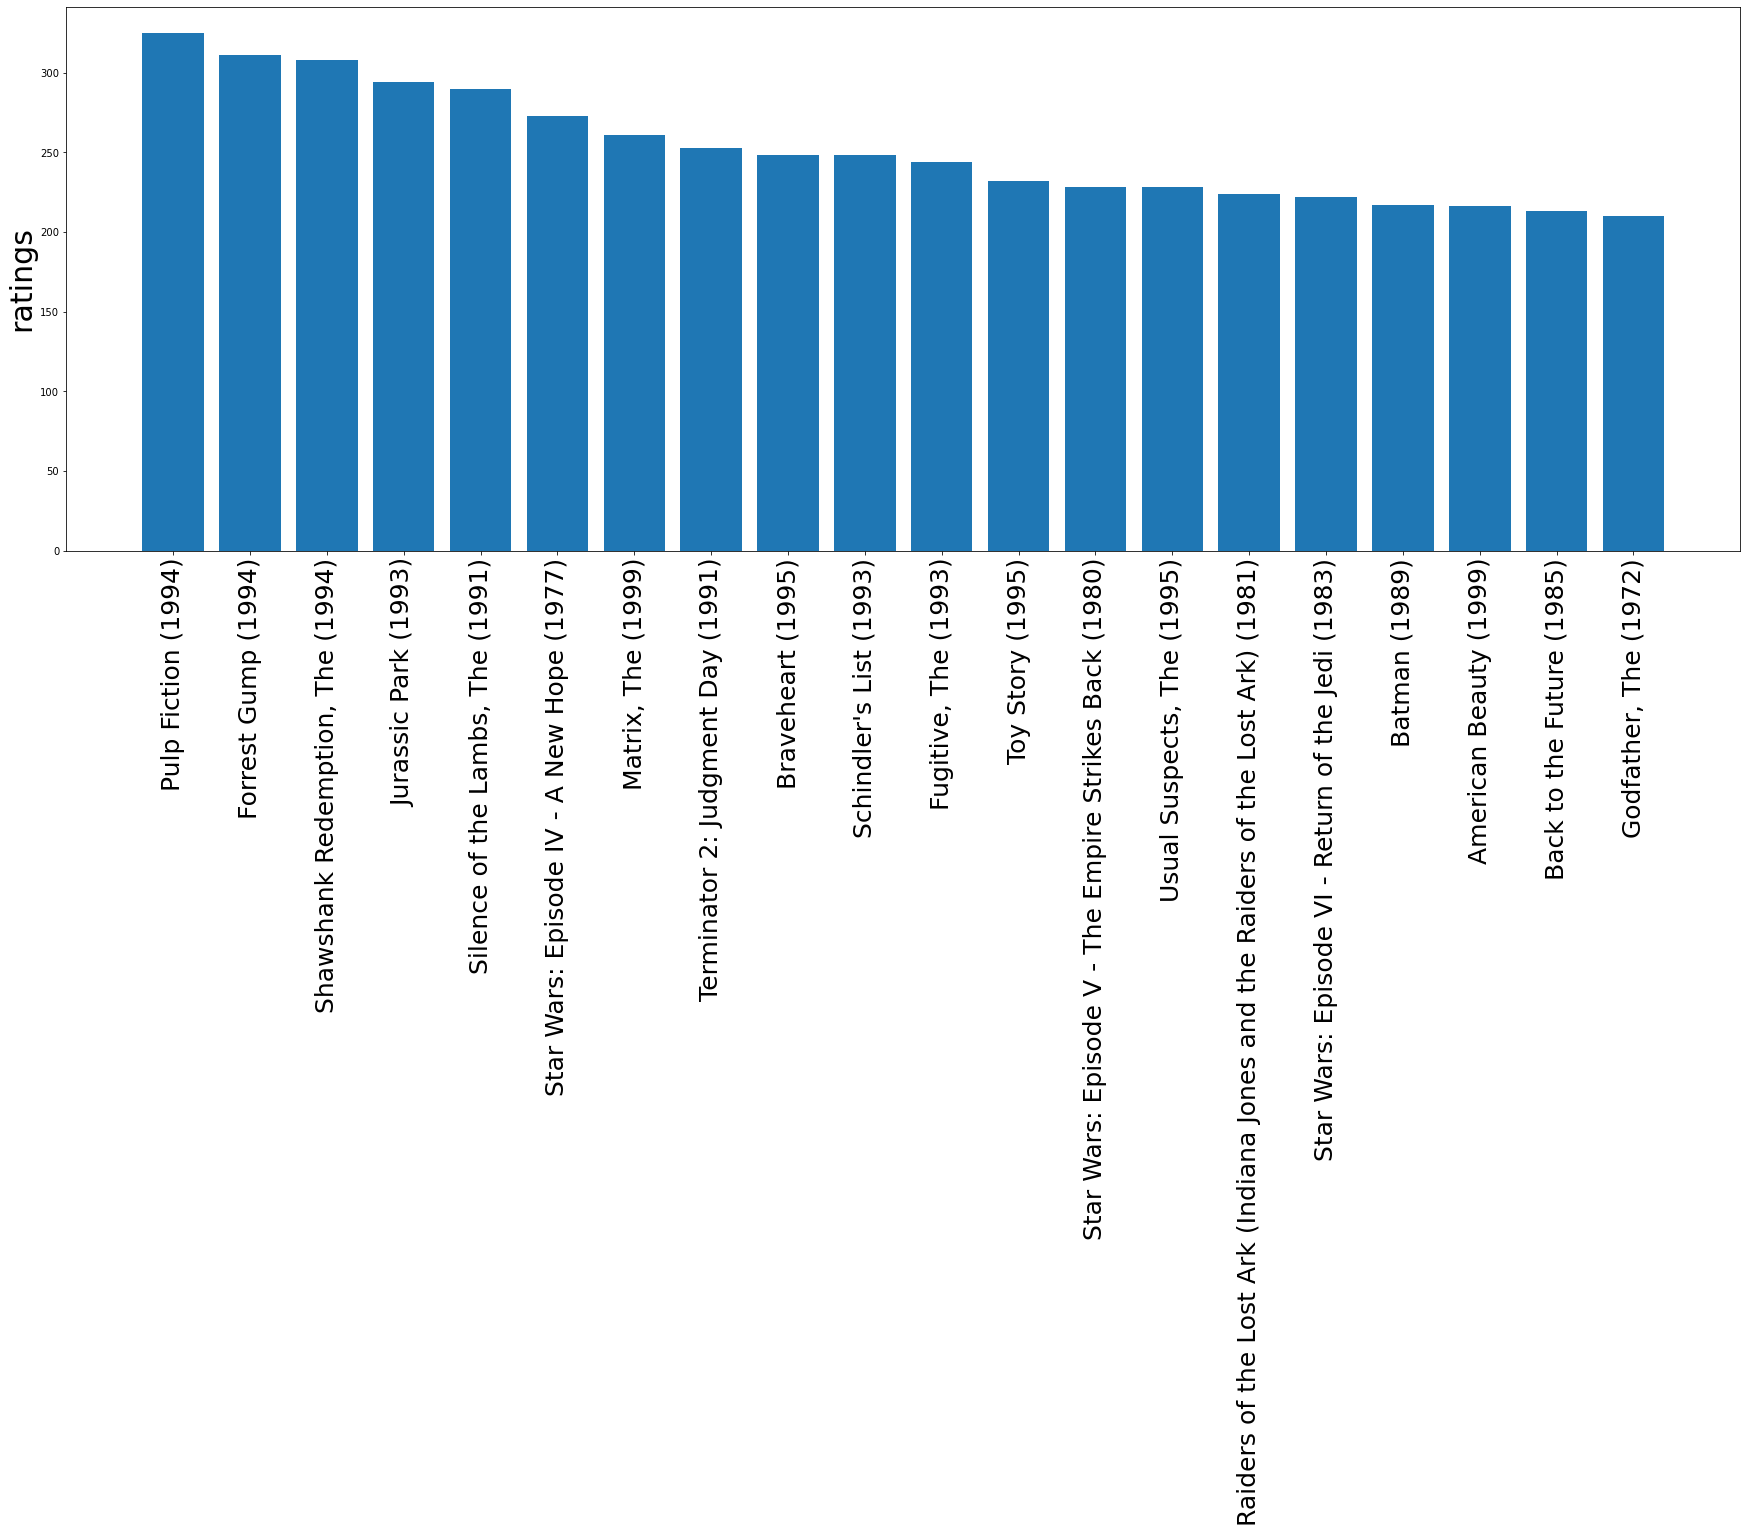

In [28]:
plt.figure(figsize=(30,10))
plt.bar(hrate.index,hrate['rating'])
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

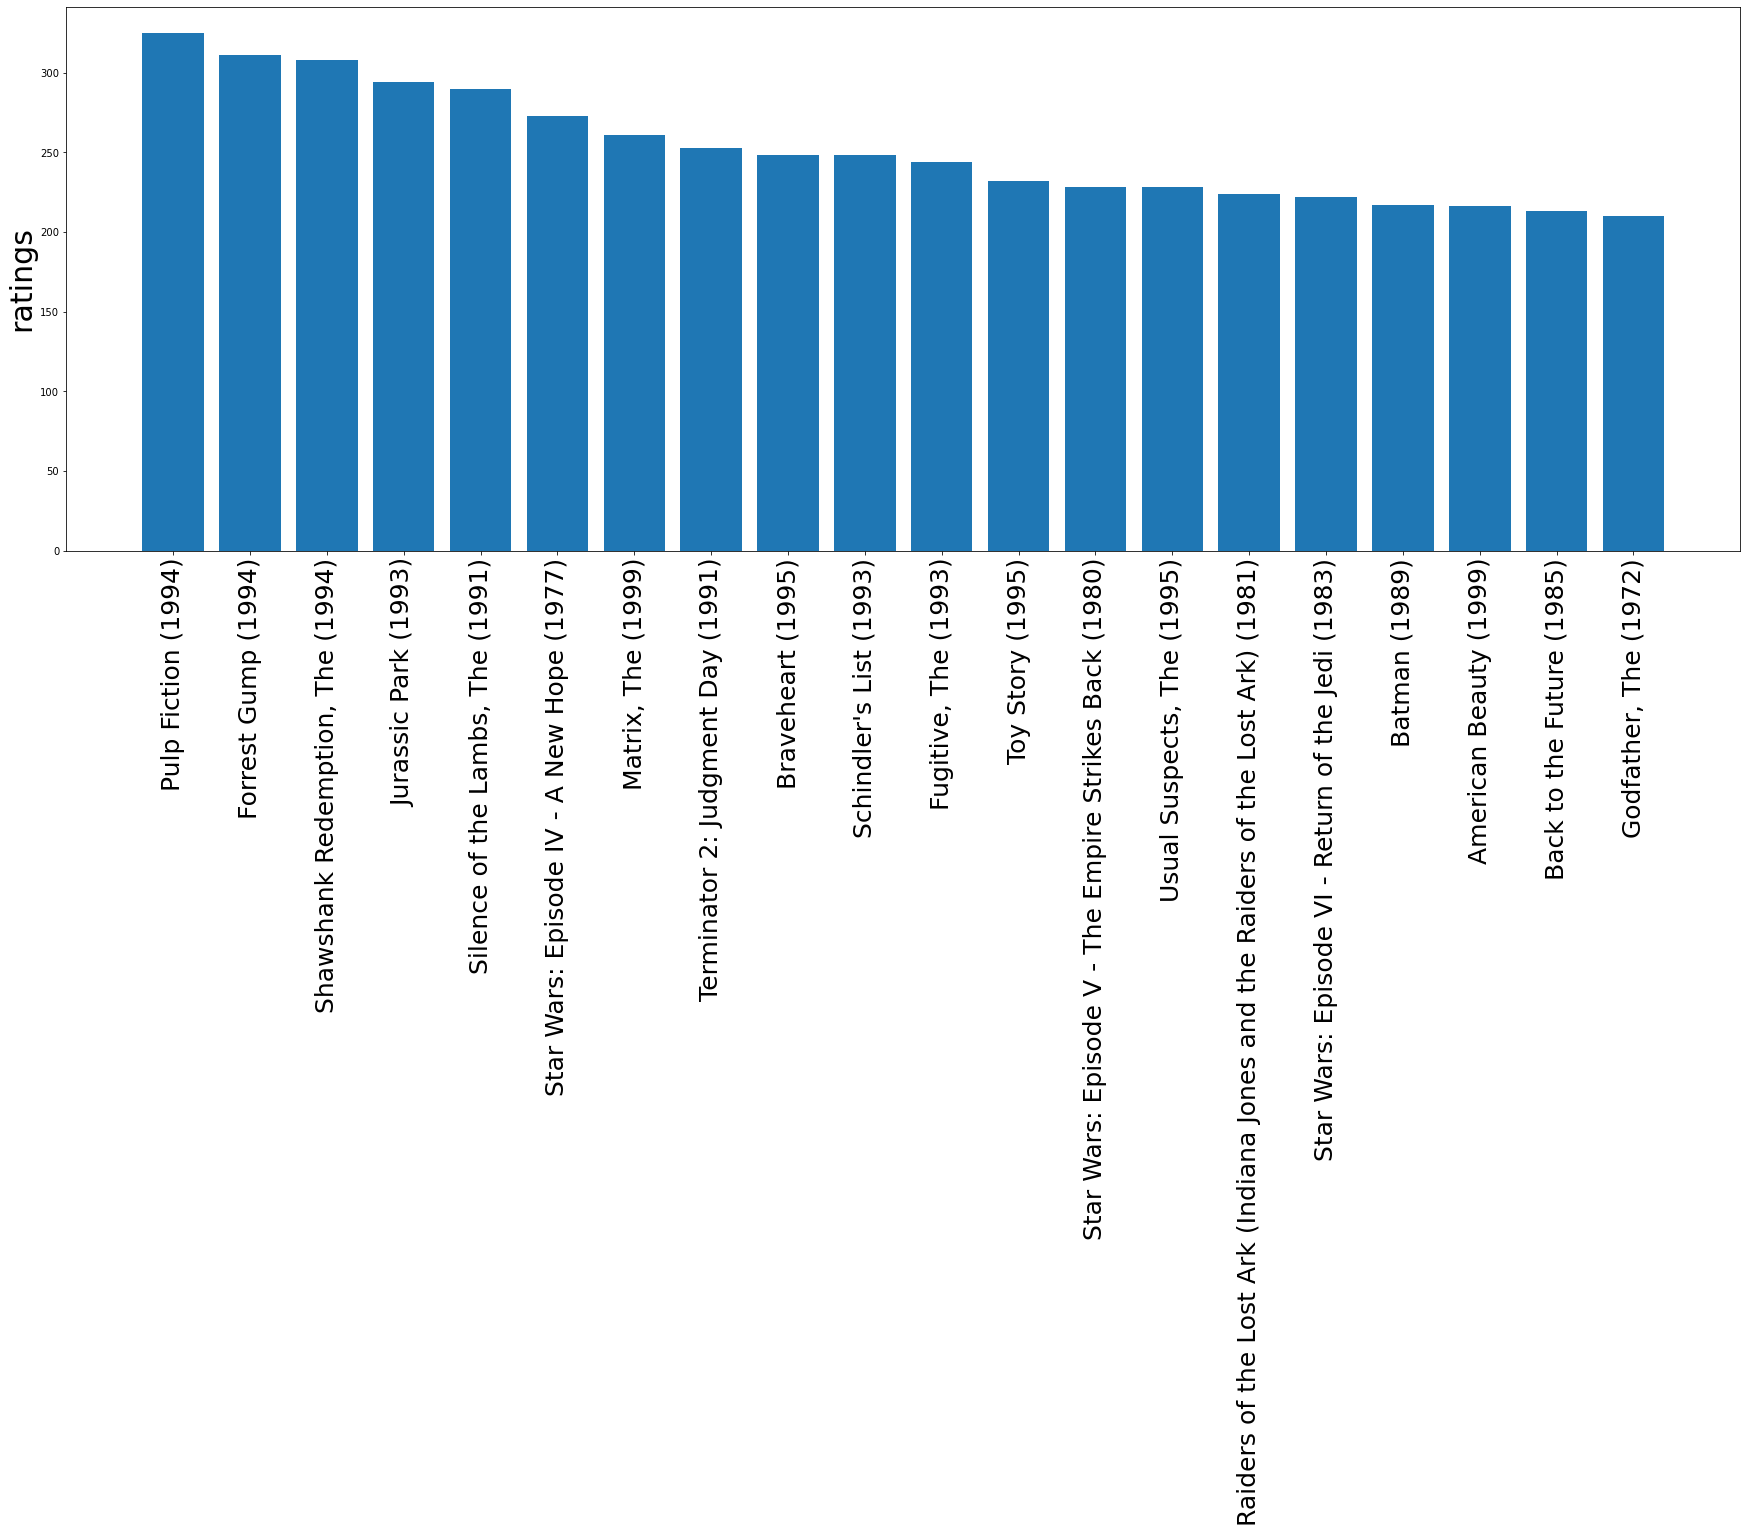

In [29]:
plt.figure(figsize=(30,10))
plt.bar(hrate.index,hrate['rating'])
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)

# Building Recommendation System

In [30]:
#making Pivot table used to find Similarities Between Movies
#This matrix will have a lot of null values since every movie is not rated by every user.
moviept = df.pivot_table(index='userId',columns='title',values='rating')
moviept.tail(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#first building model on Forest Gump Movie 
forrestgump_rating = moviept['Forrest Gump (1994)']
forrestgump_rating.head()

userId
1.0    3.0
2.0    NaN
3.0    3.0
4.0    NaN
5.0    NaN
Name: Forrest Gump (1994), dtype: float64

In [32]:
#We can find the correlation between the user ratings for the Forest Gump (1994) and all the other movies using corrwith()
moviesasforestgump = moviept.corrwith(forrestgump_rating)
moviesasforestgump

title
'71 (2014)                                            NaN
'Hellboy': The Seeds of Creation (2004)               NaN
'Round Midnight (1986)                                NaN
'Til There Was You (1997)                             NaN
'burbs, The (1989)                               0.056266
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)         NaN
xXx (2002)                                       0.096972
xXx: State of the Union (2005)                   0.157243
¡Three Amigos! (1986)                            0.672447
À nous la liberté (Freedom for Us) (1931)             NaN
Length: 10323, dtype: float64

In [33]:
#makin pandas dataframe 
corrforrestgump = pd.DataFrame(moviesasforestgump, columns=['Correlation'])
corrforrestgump.dropna(inplace=True)
corrforrestgump.head()

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375


In [34]:
#sorting values of correaltion in descending order as we will get movie with higher correlation first
corrforrestgump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0
Bottle Shock (2008),1.0
Anna Karenina (2012),1.0
Elegy (2008),1.0
Half Light (2006),1.0


In [35]:
#now it can happen that particular movie was only rated by 1 user and hence correlation can be high 
#This shows that correlation alone is not a good metric for similarity 
#because there can be a user who watched 'Forest Gump (1994) and only one other movie and rated both of them as 5
ratings_mean = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_mean['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_mean.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [36]:
corrforrestgump = corrforrestgump.join(ratings_mean['rating_counts'])
corrforrestgump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


In [37]:
#Now we can only take those movie in account which are rated by 25 or more users
rec=corrforrestgump[corrforrestgump ['rating_counts']>25].sort_values('Correlation', ascending=False).head()
rec

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
"Apartment, The (1960)",0.752525,26
Happy Gilmore (1996),0.715602,79
¡Three Amigos! (1986),0.672447,40
Rocky IV (1985),0.671805,27


In [38]:
#making an function recoomendation and wrapping up all the code
def recommendation(movie_name,moviept):
    movie_name_rating = moviept[movie_name]
    moviesasgivenmovie = moviept.corrwith(movie_name_rating)
    corrmovie_name = pd.DataFrame(moviesasgivenmovie, columns=['Correlation'])
    corrmovie_name.dropna(inplace=True)
    corrmovie_name.sort_values('Correlation', ascending=False).head(10)
    ratings_mean = pd.DataFrame(df.groupby('title')['rating'].mean())
    ratings_mean['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
    corrmovie_name = corrmovie_name.join(ratings_mean['rating_counts'])
    rec=corrmovie_name[corrmovie_name ['rating_counts']>25].sort_values('Correlation', ascending=False).head(10)
    print(rec)


In [39]:
movie_name=input()
recommendation(movie_name,moviept)

Apartment, The (1960)
                          Correlation  rating_counts
title                                               
Waterboy, The (1998)              1.0             26
Dr. Dolittle (1998)               1.0             27
Tommy Boy (1995)                  1.0             48
Road to Perdition (2002)          1.0             42
Specialist, The (1994)            1.0             48
Moonraker (1979)                  1.0             26
Congo (1995)                      1.0             51
Rudy (1993)                       1.0             28
Apartment, The (1960)             1.0             26
Big Daddy (1999)                  1.0             44
